# Компания «Мегалайн»

Компания «Мегалайн» — федеральный оператор сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Описание тарифов :**

**Тариф «Смарт»**   

Ежемесячная плата: 550 рублей :  
Включено 500 минут разговора,   
50 сообщений,    
15 Гб интернет-трафика.  

Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.

**Тариф «Ультра»**

Ежемесячная плата: 1950 рублей :   
Включено 3000 минут разговора,  
1000 сообщений,    
30 Гб интернет-трафика. 

Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from math import factorial
from scipy.stats import norm
from scipy import stats as st
import datetime
import math

In [2]:
users = pd.read_csv('/datasets/users.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
messages = pd.read_csv('/datasets/messages.csv')
internet = pd.read_csv('/datasets/internet.csv')
calls = pd.read_csv('/datasets/calls.csv')

In [3]:
users.head(3)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [5]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [6]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [7]:
messages.head(3)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000


In [8]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [9]:
internet.head(3)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000


In [10]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [11]:
calls.head(3)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000


In [12]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


### Вывод

Из изученых данных видно, что они отличаются по колличеству строк, столбцов. Таблицу users нужно просмотреть внимательно, на наличие NaN. Даты указаны как object.

## Предобработка данных

In [13]:
users.isna().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

In [14]:
users[users['churn_date'].isna()].head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Считаем пропуски методом isna() и sum(). Посмотрели на пропуски в users, NaN означает что тариф ещё действовал на момент выгрузки данных, поэтому NaN трогать не будем. В других DataFrame нет пропусков.

In [15]:
def to_datetime(data, column):
    data[column] = pd.to_datetime(data[column], errors='coerce')
    return data

Функция для преобразования столбцов с датами

In [16]:
users = to_datetime(users, 'churn_date')
users = to_datetime(users, 'reg_date')
calls = to_datetime(calls, 'call_date')
internet = to_datetime(internet, 'session_date')
messages = to_datetime(messages, 'message_date')

Преобразовал столбцы с датами формата "object" в формат "datetime64"

In [17]:
internet['mb_used'].value_counts()

0.00      19598
335.91        9
447.30        9
197.56        9
199.11        8
          ...  
182.69        1
726.03        1
315.12        1
898.99        1
677.66        1
Name: mb_used, Length: 70003, dtype: int64

Большинство значение со значением "0", удалять не будем, т к это означает, что пользователь(пользователи) не выходил(и) в сеть интернет.

In [18]:
internet = internet.drop('Unnamed: 0', 1)

Удалил столбец "Unnamed: 0" т к он нам не нужен, только мешает, и тем более, его нет в описании !

In [19]:
def month_tables(df, name, column):
    df = (
        df
        .assign(
            name = lambda x: x[column].dt.month
        )
        .rename(columns={"name": name})
    )
    return df

In [20]:
users = month_tables(users, 'month', 'reg_date')
calls = month_tables(calls, 'month', 'call_date')
internet = month_tables(internet, 'month', 'session_date')
messages = month_tables(messages, 'month', 'message_date')

Сделал функцию для добавления в таблицы колонку с месяцем, вызвал и сохранил.

In [21]:
calls = calls.assign(duration = lambda x: np.ceil(calls['duration']))
calls.loc[calls['duration'] == 0, 'duration'] = 1

Округляем звонки в большую сторону. И если звонок 0 сек, то считается как 1 минута.

In [22]:
calls_df = calls.groupby(['user_id', 'month']).agg(duration_count = ('duration', 'count'),
                                                   duration_sum = ('duration', 'sum')).reset_index()

In [23]:
calls_df.head(3)

,user_id,month,duration_count,duration_sum
0,1000,5,22,164.0
1,1000,6,43,187.0
2,1000,7,47,346.0


Таблица "количество сделанных звонков и израсходованных минут разговора по месяцам". Группируем наш DataFrame и применяем написанную ранее функцию.

In [24]:
messages_df = (
    messages
        .groupby(['user_id', 'month'])
        .agg(messages_count = ('month','count'))
        .reset_index()
)

In [25]:
messages_df.head(3)

,user_id,month,messages_count
0,1000,5,22
1,1000,6,60
2,1000,7,75


Таблица "количество отправленных сообщений по месяцам"

In [26]:
internet_df = (
    internet
        .groupby(['user_id', 'month'])
        .agg(internet_count = ('mb_used','sum'))
        .reset_index() 
        .assign(
            internet_gb = lambda x: np.ceil(x['internet_count'] / 1024)
        )
) 

In [27]:
internet_df['internet_gb'] = internet_df['internet_gb']

Округляем гигабайты в большую сторону.

In [28]:
internet_df.head(3)

,user_id,month,internet_count,internet_gb
0,1000,5,2253.49,3.0
1,1000,6,23233.77,23.0
2,1000,7,14003.64,14.0


Таблица "объем израсходованного интернет-трафика по месяцам".

In [29]:
total_df = calls_df.merge(
    internet_df, on=['user_id', 'month'], how='outer').merge(
    messages_df, on=['user_id', 'month'], how='outer')
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         3214 non-null   int64  
 1   month           3214 non-null   int64  
 2   duration_count  3174 non-null   float64
 3   duration_sum    3174 non-null   float64
 4   internet_count  3203 non-null   float64
 5   internet_gb     3203 non-null   float64
 6   messages_count  2717 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 200.9 KB


Объеденяем таблицы при помощи merge, по user_id и month, а также how='outer', чтобы вошли все строки из всех df.

In [30]:
total_df.isnull().sum()

user_id             0
month               0
duration_count     40
duration_sum       40
internet_count     11
internet_gb        11
messages_count    497
dtype: int64

Столбцы со значениями NaN

In [31]:
total_df = total_df.fillna(0)

Заменяем NaN на значение 0

In [32]:
total_df.isnull().sum()

user_id           0
month             0
duration_count    0
duration_sum      0
internet_count    0
internet_gb       0
messages_count    0
dtype: int64

In [33]:
total_df.head(3)

,user_id,month,duration_count,duration_sum,internet_count,internet_gb,messages_count
0,1000,5,22.0,164.0,2253.49,3.0,22.0
1,1000,6,43.0,187.0,23233.77,23.0,60.0
2,1000,7,47.0,346.0,14003.64,14.0,75.0


In [34]:
total_df = total_df.loc[:,~total_df.columns.duplicated()]
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         3214 non-null   int64  
 1   month           3214 non-null   int64  
 2   duration_count  3214 non-null   float64
 3   duration_sum    3214 non-null   float64
 4   internet_count  3214 non-null   float64
 5   internet_gb     3214 non-null   float64
 6   messages_count  3214 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 200.9 KB


Убрал дубликаты столбцов.

In [35]:
total_df = (
    total_df
        .set_index('user_id').join(users[['user_id','tariff', 'city']].set_index('user_id'))
        .reset_index()    
)

total_df['user_id'] = np.floor(pd.to_numeric(total_df['user_id'], errors='coerce')).astype('Int64')

In [36]:
total_df.head(3)

,user_id,month,duration_count,duration_sum,internet_count,internet_gb,messages_count,tariff,city
0,1000,5,22.0,164.0,2253.49,3.0,22.0,ultra,Краснодар
1,1000,6,43.0,187.0,23233.77,23.0,60.0,ultra,Краснодар
2,1000,7,47.0,346.0,14003.64,14.0,75.0,ultra,Краснодар


Объеденил два DataFrame с нужными столбцами, столбец "user_id" изменил тип на "Int64" (для удобства). Не удалял столбцы с месецами т к есть пользователи которые пользовались звонками + интернетом, но сообщений не посылали + для удобства ориентации.

In [37]:
tariffs.set_index('tariff_name',inplace=True)

Сделали индексом столбец 'tariff_name' в таблице tariffs

In [38]:
tariffs.head(2)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
tariff_name,,,,,,,
smart,50,15360,500,550,200,3,3
ultra,1000,30720,3000,1950,150,1,1


In [39]:
total_df.head(2)

,user_id,month,duration_count,duration_sum,internet_count,internet_gb,messages_count,tariff,city
0,1000,5,22.0,164.0,2253.49,3.0,22.0,ultra,Краснодар
1,1000,6,43.0,187.0,23233.77,23.0,60.0,ultra,Краснодар


In [40]:
total_df.head()

,user_id,month,duration_count,duration_sum,internet_count,internet_gb,messages_count,tariff,city
0,1000,5,22.0,164.0,2253.49,3.0,22.0,ultra,Краснодар
1,1000,6,43.0,187.0,23233.77,23.0,60.0,ultra,Краснодар
2,1000,7,47.0,346.0,14003.64,14.0,75.0,ultra,Краснодар
3,1000,8,52.0,418.0,14055.93,14.0,81.0,ultra,Краснодар
4,1000,9,58.0,478.0,14568.91,15.0,57.0,ultra,Краснодар


In [41]:
def det_revenue(row): 
    messages = row['messages_count']
    mb_used = row['internet_count']
    tariff = row['tariff']
    duration = row['duration_sum']
    calls = row['duration_count']
    
    extra_duration = duration - tariffs.loc[tariff, 'minutes_included']
    extra_mb = mb_used - tariffs.loc[tariff, 'mb_per_month_included']
    extra_messages = messages - tariffs.loc[tariff, 'messages_included']
    
    
    if extra_duration < 0: extra_duration = 0
    if extra_mb < 0: extra_mb = 0
    if extra_messages < 0: extra_messages = 0

    
    return (tariffs.loc[tariff, 'rub_per_message'] * extra_messages + 
               tariffs.loc[tariff, 'rub_per_gb'] / 1024 * extra_mb + 
               tariffs.loc[tariff, 'rub_per_minute'] * extra_duration + 
               tariffs.loc[tariff, 'rub_monthly_fee']
              ) 

total_df['revenue'] = total_df.apply(det_revenue, axis=1)

Функция для подсчета, сколько денег тратят пользователи в месяц на тарифе

In [42]:
total_df.head()

,user_id,month,duration_count,duration_sum,internet_count,internet_gb,messages_count,tariff,city,revenue
0,1000,5,22.0,164.0,2253.49,3.0,22.0,ultra,Краснодар,1950.0
1,1000,6,43.0,187.0,23233.77,23.0,60.0,ultra,Краснодар,1950.0
2,1000,7,47.0,346.0,14003.64,14.0,75.0,ultra,Краснодар,1950.0
3,1000,8,52.0,418.0,14055.93,14.0,81.0,ultra,Краснодар,1950.0
4,1000,9,58.0,478.0,14568.91,15.0,57.0,ultra,Краснодар,1950.0


### Вывод

Привел данные к нужному типу данных, предобработал таблицы отдельно, после объеденил их и посчитал сумму звонков, смс и интернета для каждого пользователя по месяцам. Посчитал так же выручку с каждого тарифа.

## Анализ данных

In [43]:
total_df.head()

,user_id,month,duration_count,duration_sum,internet_count,internet_gb,messages_count,tariff,city,revenue
0,1000,5,22.0,164.0,2253.49,3.0,22.0,ultra,Краснодар,1950.0
1,1000,6,43.0,187.0,23233.77,23.0,60.0,ultra,Краснодар,1950.0
2,1000,7,47.0,346.0,14003.64,14.0,75.0,ultra,Краснодар,1950.0
3,1000,8,52.0,418.0,14055.93,14.0,81.0,ultra,Краснодар,1950.0
4,1000,9,58.0,478.0,14568.91,15.0,57.0,ultra,Краснодар,1950.0


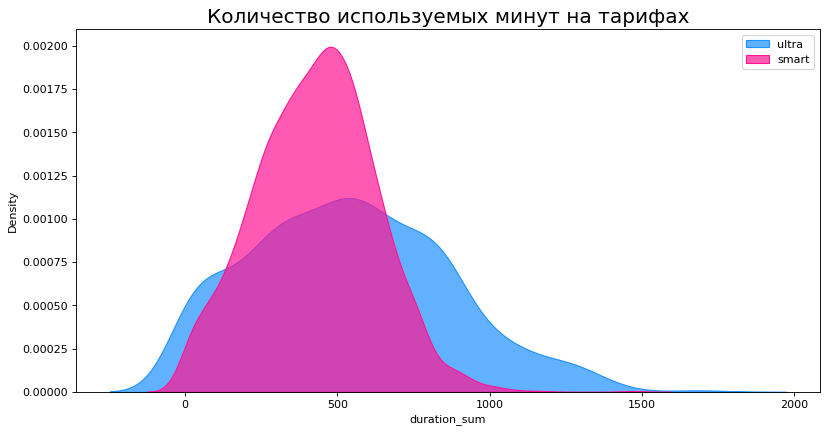

In [44]:
plt.figure(figsize=(12,6), dpi= 80)
sns.kdeplot(total_df.loc[total_df.tariff == 'ultra', "duration_sum"], shade=True, color="dodgerblue", label="ultra", alpha=.7)
sns.kdeplot(total_df.loc[total_df.tariff == 'smart', "duration_sum"], shade=True, color="deeppink", label="smart", alpha=.7)
plt.title('Количество используемых минут на тарифах', fontsize=18)
plt.legend()
plt.show()

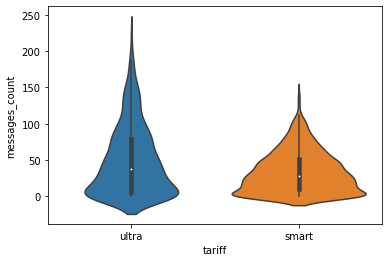

In [45]:
sns.violinplot(x='tariff', y='messages_count', data=total_df);

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


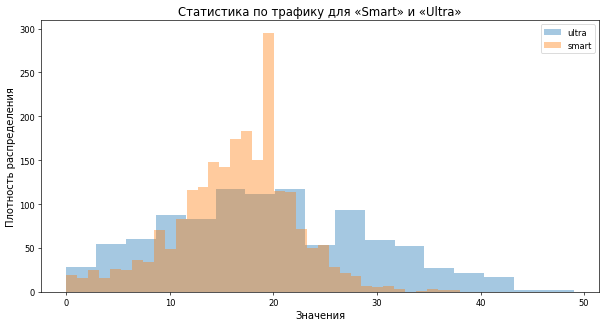

In [46]:
plt.figure(figsize=(12,6), dpi= 60)
for tariff in ['ultra', 'smart']:
    sns.distplot(total_df.query('tariff == @tariff')['internet_gb'], kde=False, label=tariff)

plt.legend(['ultra', 'smart'])
plt.legend(labels=['ultra','smart'])
plt.title('Статистика по трафику для «Smart» и «Ultra»', fontsize=14)
plt.xlabel('Значения', fontsize=12)
plt.ylabel('Плотность распределения', fontsize=12);

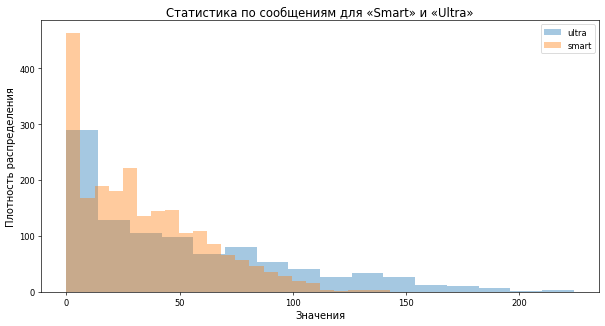

In [47]:
plt.figure(figsize=(12,6), dpi= 60)
for tariff in ['ultra', 'smart']:
    sns.distplot(total_df.query('tariff == @tariff')['messages_count'], kde=False, label=tariff)
    
plt.legend(['ultra', 'smart'])
plt.legend(labels=['ultra','smart'])
plt.title('Статистика по сообщениям для «Smart» и «Ultra»', fontsize=14)
plt.xlabel('Значения', fontsize=12)
plt.ylabel('Плотность распределения', fontsize=12);

Построил гисторгаммы по сообщениям и количеству потребляемого трафика. 

In [48]:
def barplot_style(x, y, z):
    x.plot(kind='bar', figsize=(12, 5)).set_title(z, fontsize=14)
    plt.xlabel(y, fontsize=12)
    plt.ylabel('Значения', fontsize=12)

Функция для построения графиков plot

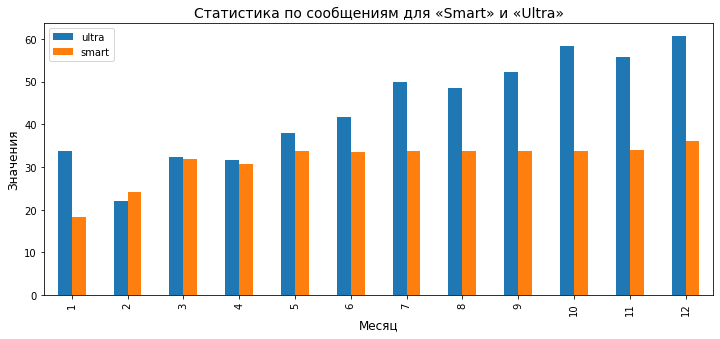

In [49]:
a = total_df.loc[total_df.tariff == 'ultra'].pivot_table(index = 'month', values = 'messages_count')
b = total_df.loc[total_df.tariff == 'smart'].pivot_table(index= 'month', values= 'messages_count')
a.rename(columns = {'messages_count' : 'ultra'}, inplace = True)
b.rename(columns = {'messages_count' : 'smart'}, inplace = True)
barplot_style(a.join(b),'Месяц','Статистика по сообщениям для «Smart» и «Ultra»')

По графику можно сделать неоднозначный вывод, в среднем количество сообщений пользователи отправляют одинаковое, есть небольшие различия что в одну, что в другую сторону. Так же количество отправленных сообщений растёт.

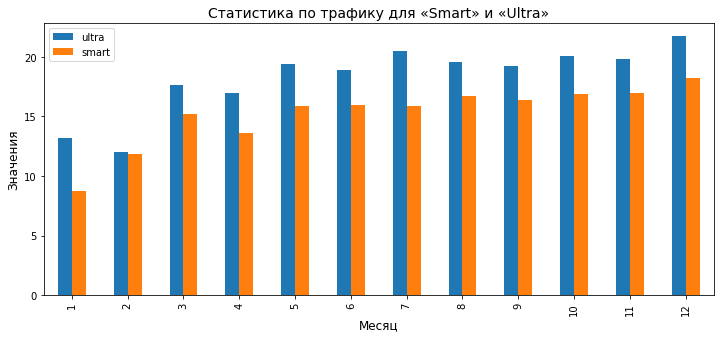

In [50]:
a = total_df.loc[total_df.tariff == 'ultra'].pivot_table(index = 'month', values = 'internet_gb')
b = total_df.loc[total_df.tariff == 'smart'].pivot_table(index= 'month', values= 'internet_gb')
a.rename(columns = {'internet_gb' : 'ultra'}, inplace = True)
b.rename(columns = {'internet_gb' : 'smart'}, inplace = True)
barplot_style(a.join(b),'Месяц','Статистика по трафику для «Smart» и «Ultra»')

Как и по сообщениям, по трафику аналогичная ситуация, количество используемого трафика примерно одинакова, и постоянно увеличивается потребление трафика.

In [51]:
tariff_mean = total_df.groupby(['tariff']).agg(duration_sum_mean = ('duration_sum','mean'),
                                 messages_count_mean = ('messages_count','mean'),
                                 internet_gb_mean = ('internet_gb','mean'),
                                 price_tariff_mean = ('revenue', 'mean')).round(1) 
tariff_mean                             

,duration_sum_mean,messages_count_mean,internet_gb_mean,price_tariff_mean
tariff,,,,
smart,429.5,33.4,16.3,1247.4
ultra,540.8,49.4,19.5,2059.9


Таблица со средними значениями по тарифам

In [52]:
tariff_var = total_df.groupby(['tariff']).agg(duration_sum_var = ('duration_sum','var'),
                                 messages_count_var = ('messages_count','var'),
                                 internet_gb_var = ('internet_gb','var'),
                                 price_tariff_var = ('revenue', 'var')).round(1)
tariff_var                              

,duration_sum_var,messages_count_var,internet_gb_var,price_tariff_var
tariff,,,,
smart,37974.8,796.8,33.0,632144.1
ultra,106105.7,2285.3,97.1,125940.4


Таблица с дисперсией по значениям тарифов

In [53]:
tariff_std = total_df.groupby(['tariff']).agg(duration_sum_std = ('duration_sum','std'),
                                 messages_count_std = ('messages_count','std'),
                                 internet_gb_std = ('internet_gb','std'),
                                 price_tariff_std = ('revenue', 'std')).round(1)
tariff_std                          

,duration_sum_std,messages_count_std,internet_gb_std,price_tariff_std
tariff,,,,
smart,194.9,28.2,5.7,795.1
ultra,325.7,47.8,9.9,354.9


Таблица со стандартным отклонениями по значениям тарифов

In [54]:
def plot_bar_graff(column_name, fun, title, x_label, y_label):
    total_df.groupby(['tariff']).agg(messages = (column_name, fun)).plot.bar(figsize = (6, 6))
    plt.title(title, fontsize = 16)
    plt.xlabel(x_label, fontsize = 14)
    plt.ylabel(y_label, fontsize = 14)
    plt.legend('',frameon=False);

Функция для построения графиков

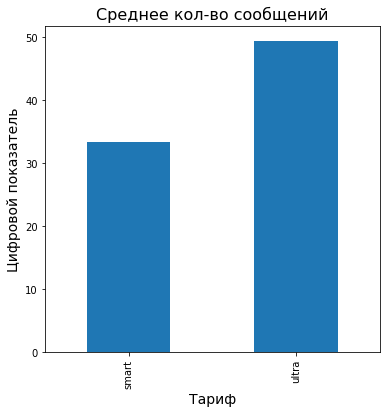

In [55]:
plot_bar_graff('messages_count', 
               'mean',
               'Среднее кол-во сообщений',
               'Тариф',
               'Цифровой показатель')

По графику видно, что среднее кол-во сообщений на тарифе ultra больше, чем на smart

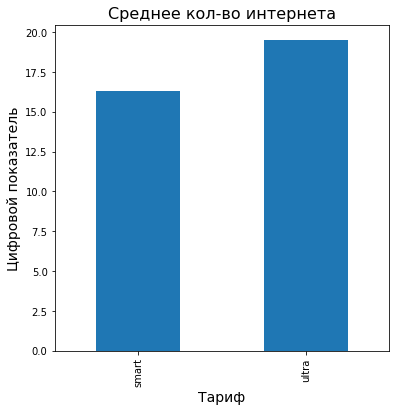

In [56]:
plot_bar_graff('internet_gb', 
               'mean',
               'Среднее кол-во интернета',
               'Тариф',
               'Цифровой показатель')

По графику видно, что среднее кол-во интернета на тарифе ultra немного больше используют, чем на smart

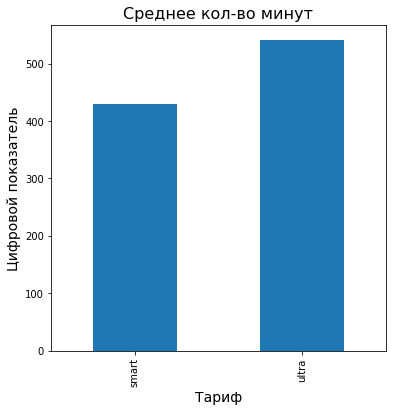

In [57]:
plot_bar_graff('duration_sum', 
               'mean',
               'Среднее кол-во минут',
               'Тариф',
               'Цифровой показатель')

По графику видно, что среднее кол-во минут на тарифе ultra используют больше, чем на smart

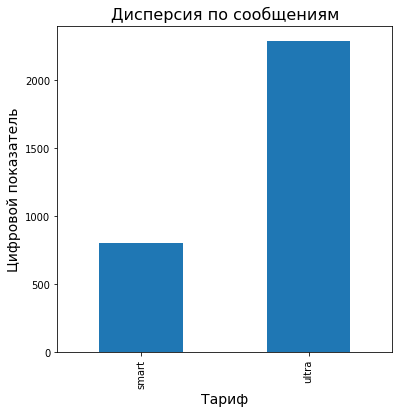

In [58]:
plot_bar_graff('messages_count', 
               'var',
               'Дисперсия по сообщениям',
               'Тариф',
               'Цифровой показатель')

По графику видно, что дисперсия по кол-ву сообщений на тарифе ultra намного выше, чем на smart

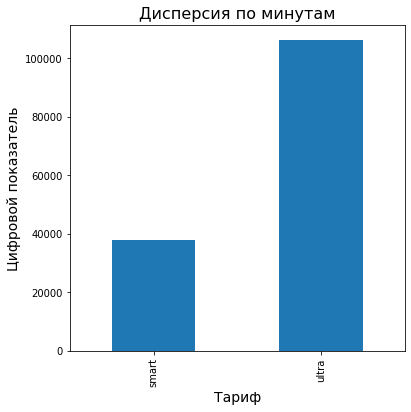

In [59]:
plot_bar_graff('duration_sum', 
               'var',
               'Дисперсия по минутам',
               'Тариф',
               'Цифровой показатель')

По графику видно, что дисперсия по минутам на тарифе ultra намного выше, чем на smart

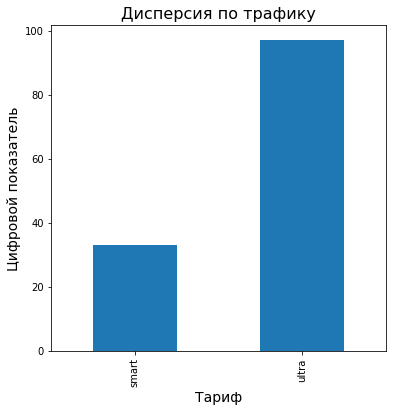

In [60]:
plot_bar_graff('internet_gb', 
               'var',
               'Дисперсия по трафику',
               'Тариф',
               'Цифровой показатель')

По графику видно, что дисперсия по кол-ву трафика на тарифе ultra намного выше, чем на smart

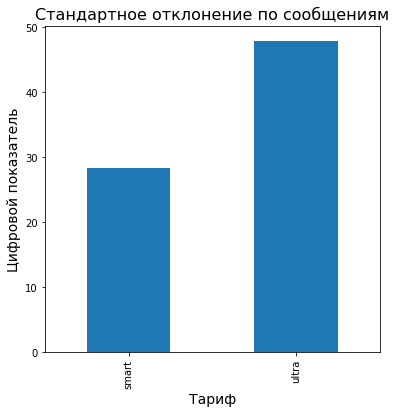

In [61]:
plot_bar_graff('messages_count', 
               'std',
               'Стандартное отклонение по сообщениям',
               'Тариф',
               'Цифровой показатель')

По графику видно, что стандартное отклонение по кол-ву сообщений на тарифе ultra выше, чем на smart

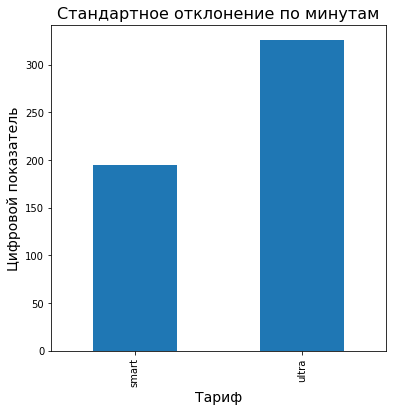

In [62]:
plot_bar_graff('duration_sum', 
               'std',
               'Стандартное отклонение по минутам',
               'Тариф',
               'Цифровой показатель')

По графику видно, что стандартное отклонение по минутам на тарифе ultra выше, чем на smart

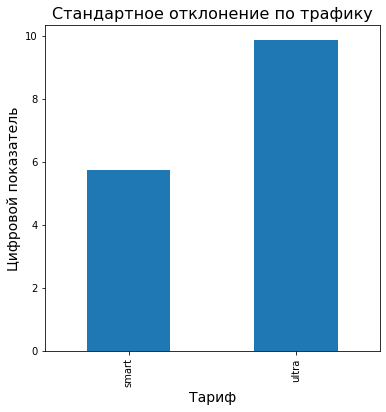

In [63]:
plot_bar_graff('internet_gb', 
               'std',
               'Стандартное отклонение по трафику',
               'Тариф',
               'Цифровой показатель')

По графику видно, что стандартное отклонение по трафику на тарифе ultra выше, чем на smart

### Вывод

В данном разделе я посчитал сколько требуется минут, сообщений и интернета требуется пользователям тарифов. Так же посчитал стреднее количество, дисперсию и стандартное отклонение, построил гистограммы, описал распределения. Поведение клиентов тарифов примерно похожи, на первый взгляд, что пользователи тарифа ultra переплачивают т к не пользуются всеми предоставленными возможностями тарифа.

## Проверка гипотиз

**Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются**

In [64]:
# H0 - средняя выручка пользователей тарифов «Ультра» и «Смарт» одинакова
# H1 - средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

# а - 5%


smart = total_df.query('tariff == "smart"')['revenue']
ultra = total_df.query('tariff == "ultra"')['revenue']

alpha = .05

results = st.ttest_ind(
    smart, 
    ultra,
    equal_var=False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  6.986283750103436e-285
Отвергаем нулевую гипотезу


In [65]:
total_df.groupby(['tariff']).agg(price_tariff = ('revenue','median'))

,price_tariff
tariff,
smart,983.613281
ultra,1950.000000


Cредняя выручка пользователей тарифов «Ультра» и «Смарт» сильно различается

**Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов**

In [66]:
# H0 - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов одинаковая
# H1 - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов различаются

# а - 5%


yes_msk = total_df.query('city == "Москва"')['revenue']
no_msk = total_df.query('city != "Москва"')['revenue']

alpha = .05

results = st.ttest_ind(
    yes_msk, 
    no_msk,
    equal_var=False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.4966381972473627
Не получилось отвергнуть нулевую гипотезу


In [67]:
def region(city):
    if city == 'Москва': 
        return 'Москва'
    else: 
        return 'Другой регион'

In [68]:
total_df['region'] = total_df['city'].apply(region)
total_df.groupby(['region']).agg(region = ('revenue','median'))

,region
region,
Другой регион,1539.203125
Москва,1728.033203


Да, в Москве действительно на связь тратят немного больше, чем в других регионах.

### Вывод

Нулевую гепотизу выбраем исходя из :

"В нулевой гипотезе всегда предполагается равенство сравниваемых значений. 
Следовательно, альтернативная гипотеза не может содержать в себе знака равенства, поскольку она принимается, если отвергается нулевая. "

## Общий вывод

**Проанализировали поведение клиентов компания «Мегалайн» и сделали вывод — какой тариф лучше.**

В данном проекте мы начали со знакомством данных, просмотрели все таблицы которые нам предоставили, после изучения, я принялся их предобрабатывать, а именно : искал NaN, различные диффекты в таблицах, также переделал формат некоторых столбцов, для облегчения дальнейшей работы с ними, добавлял новые столбцы, округлял нужные значения и тд. После, я принялся за анализ данных : На тарифе ultra разговаривают гораздо больше, чем на smart, хотя есть месяц, где значения примерно одинаковые.
В среднем количество сообщений пользователи отправляют одинаковое, есть небольшие различия что в одну, что в другую сторону. Так же количество отправленных сообщений растёт.
По трафику аналогичная ситуация, количество используемого трафика примерно одинакова, и постоянно увеличивается потребление трафика.
Среднее по сообщениям и интернету на тарифах примерно одинаково. Разница есть, но не существенная.
Интернетом на тарифе ultra объём трафика немного больше, но выручка на тарифе ultra гораздо больше, чем на smart.
Дисперсия по сообщениям примерно одинаковая, но дисперсия на тарифе ultra чуть выше и по сообщениям и по интернету.
Дисперсия по минутам выше на тарифе ultra, но дисперсия на тарифе smart намного превосходит по выручке.
Стандартное отклонение на тарифах примерно одинаковое, но на тарифе ultra оно немного больше.
Что стандартное отклонение на тарифе smart по минутам меньше, чем на ultra, но стандартное отклонение на тарифе smart по выручке гораздо больше, чем на ultra.

Далее, я перешел к проверке гипотиз и сделал выводы:


Cредняя выручка пользователей тарифов «Ультра» и «Смарт» сильно различается, пользователи smart тарифа переплачивают сверх тарифа примерно 600 руб и им не хватает включенных в тариф услуг, пользователи ultra тарифа наоборот, не используют все включенные возможности своего тарифа, особенно смс.

Исходя из всех расчётов, наиболее преспективный тариф "Ultra", как в Москве, так и в других городах, хоть разница не велика. На него пользователи тратят больше денег, чем на "smart".